In [136]:
import numpy as np

In [137]:
import pandas as pd

s140_train = pd.read_csv("/Users/gregorycrooks/Desktop/NLP Coursework/Datasets/Sentiment140/s140_train.csv", encoding='latin-1', header = 0,
names = ["Sentiment", "PhraseID", "Date", "Hashtag", "Username", "Phrase"])
s140_test = pd.read_csv("/Users/gregorycrooks/Desktop/NLP Coursework/Datasets/Sentiment140/s140_test.csv", encoding='latin-1', header = 0,
names = ["Sentiment", "PhraseID", "Date", "Hashtag", "Username", "Phrase"]) 
rtmr_test = pd.read_csv("/Users/gregorycrooks/Desktop/NLP Coursework/Datasets/RottenTomatoesMovieReviews/rtmr_test.tsv", encoding='latin-1', sep='\t', header=0)
rtmr_train = pd.read_csv("/Users/gregorycrooks/Desktop/NLP Coursework/Datasets/RottenTomatoesMovieReviews/rtmr_train.tsv", encoding='latin-1', sep='\t', header=0)


amount = 5000

s140_train = s140_train.loc[::200]
rtmr_train = rtmr_train.loc[::30]
print(len(s140_train))
print(len(s140_test))
print(len(rtmr_test))
print(len(rtmr_train))
s140_train.head()


8000
497
7803
4942


,Sentiment,PhraseID,Date,Hashtag,Username,Phrase
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
200,0,1467861571,Mon Apr 06 22:33:01 PDT 2009,NO_QUERY,jessejoseph,@stustone Your show is whack. Way worse than w...
400,0,1467913608,Mon Apr 06 22:47:05 PDT 2009,NO_QUERY,qsexy,"Home from Franklin street, I almost jumped ove..."
600,0,1467963880,Mon Apr 06 23:01:21 PDT 2009,NO_QUERY,JesseW84,@birutagme yeah it was really depressing... s...
800,0,1468010183,Mon Apr 06 23:14:42 PDT 2009,NO_QUERY,marythedork,@sarahsaturday I'm sorry your gift card ran ou...


In [138]:

print((s140_train['Sentiment']==4).mean())
print("\nrtmr")
for i in range(5):
    print("data: ",i, " ", (rtmr_train['Sentiment']==i).mean())



0.5

rtmr
data:  0   0.043099959530554434
data:  1   0.17927964386887899
data:  2   0.5056657223796034
data:  3   0.21246458923512748
data:  4   0.059490084985835696


In [139]:
from nltk.corpus import stopwords 
import re
from nltk import word_tokenize
from string import punctuation
from nltk.stem import PorterStemmer


punctuation_list = list(punctuation)
punctuation_list.append("@")
punctuation_list.append("http")
stop_words = set(stopwords.words("english"))
ignore_words = stop_words
#Remove stopwords, remove punctuation, special characters,Hyperlinks, remove hyphens, remove dots fro abbreviations,
# Select only those with letters from a to z, join words with Empty spaces between them)

def get_labels(dataset):
    dataset.head(3)
    text_to_list = dataset["Phrase"].tolist()
    sentiment_to_list = dataset["Sentiment"].tolist()
    text_tokenised = []
    sentiments_final = []
    for i in range(len(text_to_list)):
        try:
            tokens = word_tokenize(text_to_list[i].lower())
            if(len(tokens)>1):
                text_tokenised.append(tokens) #  Add text tokens to list
                sentiments_final.append(sentiment_to_list[i]) # Add label for valid email to labels list
        except:
            pass
    labels_final = []
    for i in sentiments_final:
        if i == 1:
            i = 0
        elif i == 3:
            i = 4
        else:
            i = i
        labels_final.append(i)
    return labels_final


def pre_processing(dataset, ignore_words = []):
    text_to_list = dataset["Phrase"].tolist()
    text_tokenised = []
    sentiments_final = []
    for i in range(len(text_to_list)):
        try:
            tokens = word_tokenize(text_to_list[i].lower())
            if(len(tokens)>1):
                text_tokenised.append(tokens) #  Add text tokens to list
                sentiments_final.append(text_to_list[i]) 
        except:
            pass
    
    text_preprocessed = text_tokenised
    porter = PorterStemmer()
    for i in range(len(text_preprocessed)):
        new_tokens = []
        for word in text_preprocessed[i]:
                word = word.replace("-","") # Remove hyphens from words, e.g. lower-case->lowercase
                word = word.replace(".","")
                regex_check = re.match("[a-z]+", word)
                if(regex_check!=None):
                    if(regex_check.group()==word): 
                        if word not in punctuation_list:
                            if word not in ignore_words:
                                porter.stem(word)
                                new_tokens.append(word)
        text_preprocessed[i] = new_tokens
    for i in range(len(text_preprocessed)):
        if(len(text_preprocessed[i])==0):
            print("text",i,"is empty!")
    dataset = []
    for i in range(len(text_preprocessed)):
        text = " ".join(text_preprocessed[i])
        dataset.append(text)
    return dataset

processed_rtmr_test = pre_processing(rtmr_test, ignore_words = stop_words)
processed_rtmr_train = pre_processing(rtmr_train, ignore_words = stop_words)
processed_s140_train = pre_processing(s140_train, ignore_words = stop_words)
processed_s140_test = pre_processing(s140_test, ignore_words = stop_words)

labels_rtmr_test = get_labels(rtmr_test)
labels_rtmr_train = get_labels(rtmr_train)
labels_s140_train = get_labels(s140_train)
labels_s140_test = get_labels(s140_test)

text 24 is empty!
text 67 is empty!
text 178 is empty!
text 193 is empty!
text 281 is empty!
text 286 is empty!
text 294 is empty!
text 313 is empty!
text 339 is empty!
text 460 is empty!
text 534 is empty!
text 608 is empty!
text 777 is empty!
text 937 is empty!
text 996 is empty!
text 1086 is empty!
text 1105 is empty!
text 1116 is empty!
text 1244 is empty!
text 1248 is empty!
text 1266 is empty!
text 1437 is empty!
text 1459 is empty!
text 1526 is empty!
text 1586 is empty!
text 1626 is empty!
text 1805 is empty!
text 1860 is empty!
text 1873 is empty!
text 2033 is empty!
text 2053 is empty!
text 2201 is empty!
text 2221 is empty!
text 2257 is empty!
text 2395 is empty!
text 2420 is empty!
text 2469 is empty!
text 2487 is empty!
text 2669 is empty!
text 2682 is empty!
text 2702 is empty!
text 2840 is empty!
text 2841 is empty!
text 2872 is empty!
text 2967 is empty!
text 3152 is empty!
text 3158 is empty!
text 3233 is empty!
text 3319 is empty!
text 3490 is empty!
text 3516 is empt

Count words

In [141]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [142]:


mapping = {0:0, 2:1, 4:2}
def map_array(array):
    return np.array([mapping[item] for item in array])


processed_s140_train = np.array(processed_s140_train)
labels_s140_train = np.array(labels_s140_train)
args = np.random.permutation(len(processed_s140_train))

cv = CountVectorizer(max_features = 1000)

X_train_s140_s140 = cv.fit_transform(processed_s140_train).toarray()[args]
X_test_s140_s140 = cv.transform(processed_s140_test).toarray()
X_test_s140_rtmr = cv.transform(processed_rtmr_test).toarray()

y_train_s140 = map_array(labels_s140_train[args])
y_test_s140  = map_array(labels_s140_test)

processed_rtmr_train = np.array(processed_rtmr_train)
labels_rtmr_train = np.array(labels_rtmr_train)
args = np.random.permutation(len(processed_rtmr_train))

cv = CountVectorizer(max_features = 1000)

X_train_rtmr_rtmr = cv.fit_transform(processed_rtmr_train).toarray()[args]
X_test_rtmr_rtmr = cv.transform(processed_rtmr_test).toarray()
X_test_rtmr_s140 = cv.transform(processed_s140_test).toarray()

y_train_rtmr = map_array(labels_rtmr_train[args])
y_test_rtmr  = map_array(labels_rtmr_test)



In [143]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


def convert_prob_to_class(probs, threshold_1, threshold_2):

    def convert_single_probability(prob, threshold_1=threshold_1, threshold_2=threshold_2):
        if prob < threshold_1:
            return 0
        if prob >= threshold_2:
            return 2
        else:
            return 1
    return np.array([convert_single_probability(item) for item in probs[:, 1]])

def naive_bayes(processed_train, processed_test, labels_train, labels_test, create_new_class, threshold_1=0.33, threshold_2=0.66):
      samples_train = processed_train 
      samples_test = processed_test
      labels_train = labels_train
      labels_test = labels_test

      no_of_training_samples = len(samples_train)
      no_of_test_samples = len(samples_test)
      total_samples = no_of_training_samples+no_of_test_samples
      print("Total samples:\t\t%4d" % total_samples)
      print("Training samples:\t%4d (%2.2f%s)" %(no_of_training_samples,(no_of_training_samples/total_samples)*100,"%"))
      print("Test samples:\t\t%d4d (%2.2f%s)" %
            (no_of_test_samples,(no_of_test_samples/total_samples)*100,"%"))
            
      model = make_pipeline(MultinomialNB())
      model.fit(samples_train, labels_train) # Train the model on the training data
      if create_new_class:
          probabilities = model.predict_proba(samples_test) 
          predicted_categories = convert_prob_to_class(probabilities, threshold_1=threshold_1, threshold_2=threshold_2)
      else:
          predicted_categories = model.predict(samples_test)

      sns.set()
      mat = confusion_matrix(labels_test, predicted_categories)
      sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
      plt.xlabel("True label")
      plt.ylabel("Predicted label")
      plt.show()
      print("Accuracy:\t%f" % accuracy_score(labels_test, predicted_categories))
      print("F1-score:\t%f" % f1_score(labels_test, predicted_categories, average='macro'))
      print("Precision:\t%f" % precision_score(labels_test, predicted_categories, average='macro'))
      print("Recall:\t\t%f" % recall_score(labels_test, predicted_categories, average='macro'))

      print("\nClassification performance:\n%s" % classification_report(labels_test, predicted_categories))



train RTMR, test RTMR
Total samples:		11409
Training samples:	4445 (38.96%)
Test samples:		69644d (61.04%)


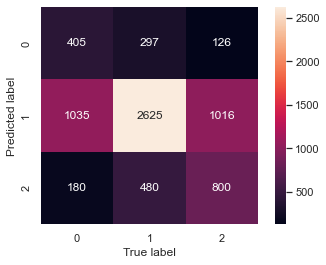

Accuracy:	0.549971
F1-score:	0.483702
Precision:	0.532818
Recall:		0.477850

Classification performance:
              precision    recall  f1-score   support

           0       0.49      0.25      0.33      1620
           1       0.56      0.77      0.65      3402
           2       0.55      0.41      0.47      1942

    accuracy                           0.55      6964
   macro avg       0.53      0.48      0.48      6964
weighted avg       0.54      0.55      0.53      6964

Train rtmr, test s140
Total samples:		4942
Training samples:	4445 (89.94%)
Test samples:		4974d (10.06%)


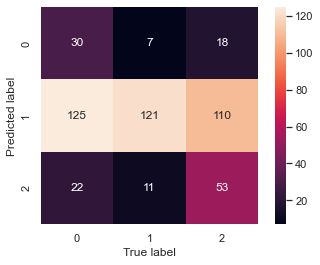

Accuracy:	0.410463
F1-score:	0.381504
Precision:	0.500540
Recall:		0.444271

Classification performance:
              precision    recall  f1-score   support

           0       0.55      0.17      0.26       177
           1       0.34      0.87      0.49       139
           2       0.62      0.29      0.40       181

    accuracy                           0.41       497
   macro avg       0.50      0.44      0.38       497
weighted avg       0.51      0.41      0.37       497

Train s140, test s140
Total samples:		8482
Training samples:	7985 (94.14%)
Test samples:		4974d (5.86%)


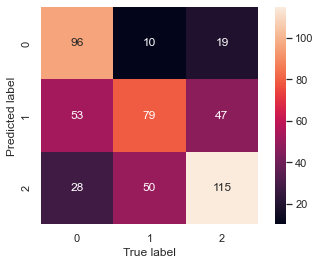

Accuracy:	0.583501
F1-score:	0.582530
Precision:	0.601732
Recall:		0.582026

Classification performance:
              precision    recall  f1-score   support

           0       0.77      0.54      0.64       177
           1       0.44      0.57      0.50       139
           2       0.60      0.64      0.61       181

    accuracy                           0.58       497
   macro avg       0.60      0.58      0.58       497
weighted avg       0.61      0.58      0.59       497

Train s140, test rtmr
Total samples:		14949
Training samples:	7985 (53.41%)
Test samples:		69644d (46.59%)


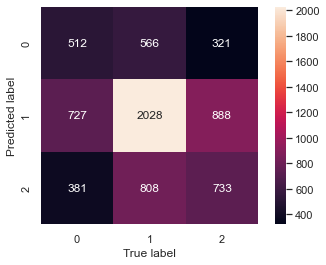

Accuracy:	0.469989
F1-score:	0.431437
Precision:	0.434678
Recall:		0.429872

Classification performance:
              precision    recall  f1-score   support

           0       0.37      0.32      0.34      1620
           1       0.56      0.60      0.58      3402
           2       0.38      0.38      0.38      1942

    accuracy                           0.47      6964
   macro avg       0.43      0.43      0.43      6964
weighted avg       0.46      0.47      0.47      6964



In [144]:
print("train RTMR, test RTMR")
probabilities = naive_bayes(processed_train=X_train_rtmr_rtmr, 
                                processed_test=X_test_rtmr_rtmr, 
                                labels_train=y_train_rtmr, 
                                labels_test = y_test_rtmr, create_new_class=False)
#  This votes too heavy for number 1

## word frequencies hide information - not bad!! -> means good, but word frequencies will see the word 'bad'. 

print("Train rtmr, test s140")
probabilities = naive_bayes(processed_train=X_train_rtmr_rtmr, 
                                processed_test=X_test_rtmr_s140, 
                                labels_train=y_train_rtmr, 
                                labels_test = y_test_s140, create_new_class=False)
# This performs well also, this is because yjr rtmr dataset supports the output classes seen on the test s140 dataset

print("Train s140, test s140")
probabilities = naive_bayes(processed_train=X_train_s140_s140, 
                                processed_test=X_test_s140_s140, 
                                labels_train=y_train_s140, 
                                labels_test = y_test_s140, create_new_class=True)

print("Train s140, test rtmr")
probabilities = naive_bayes(processed_train=X_train_s140_s140, 
                                processed_test=X_test_s140_rtmr, 
                                labels_train=y_train_s140, 
                                labels_test = y_test_rtmr, create_new_class=True, threshold_1=0.45, threshold_2=0.55)

In [145]:
X_train_s140_s140.shape

(7985, 1000)

In [146]:
y_train_rtmr.shape

(4445,)

In [147]:
y_train_s140.shape

(7985,)

In [148]:
print(X_test_s140_s140.shape)

(497, 1000)


In [149]:
def naive_bayes(processed_train, processed_test, labels_train, labels_test, create_new_class, threshold_1=0.33, threshold_2=0.66):
      samples_train = processed_train 
      samples_test = processed_test
      labels_train = labels_train
      labels_test = labels_test

      no_of_training_samples = len(samples_train)
      no_of_test_samples = len(samples_test)
      total_samples = no_of_training_samples+no_of_test_samples
      print("Total samples:\t\t%4d" % total_samples)
      print("Training samples:\t%4d (%2.2f%s)" %(no_of_training_samples,(no_of_training_samples/total_samples)*100,"%"))
      print("Test samples:\t\t%d4d (%2.2f%s)" %
            (no_of_test_samples,(no_of_test_samples/total_samples)*100,"%"))
            
      model = make_pipeline(MultinomialNB())
      model.fit(samples_train, labels_train) # Train the model on the training data
      if create_new_class:
          probabilities = model.predict_proba(samples_test)
          return model
print(X_train_s140_s140.shape)

model = naive_bayes(processed_train=X_train_s140_s140, 
                                processed_test=X_test_s140_s140, 
                                labels_train=y_train_s140, 
                                labels_test = y_test_s140, create_new_class=True)

(7985, 1000)
Total samples:		8482
Training samples:	7985 (94.14%)
Test samples:		4974d (5.86%)


In [185]:
import numpy as np
## train on both s140 (doesn't have neutral class) and rtmr (does have neutral class)
processed_s140_train = np.array(processed_s140_train)
labels_s140_train = np.array(labels_s140_train)

combined_train = np.concatenate((processed_s140_train, processed_s140_test))
combined_test  = np.concatenate((processed_s140_test, processed_rtmr_test))

args = np.random.permutation(len(combined_train))

cv = CountVectorizer(max_features = 1000)

X_train_combined = cv.fit_transform(combined_train[args][:5000]).toarray()
X_test_combined = cv.transform(combined_test).toarray()

y_train_combined = map_array(np.concatenate((labels_rtmr_train, labels_s140_train)))[args][:5000]
y_test_combined = map_array(np.concatenate((labels_rtmr_test, labels_s140_test)))



In [186]:
print("Train combined, test combined")
probabilities = naive_bayes(X_train_combined, 
                            X_test_combined, 
                            y_train_combined, 
                            y_test_combined, create_new_class=False)

Train combined, test combined
Total samples:		12461
Training samples:	5000 (40.13%)
Test samples:		74614d (59.87%)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## RTMR data

In [ ]:
rtmr_train
rtmr_x_train = rtmr_train['Phrase']
rtmr_x_test = rtmr_test['Phrase']


rtmr_y_train = rtmr_train['Sentiment'].values
rtmr_y_test = rtmr_test['Sentiment'].values


## s140_neural_network

In [ ]:
s140_x_train = s140_train['Phrase']

s140_train_filtered_mapping = {0:0, 4:1}
s140_train_mapping = {0:0, 2:1, 4:2}

s140_y_filtered_train = np.array([s140_train_filtered_mapping[item] for item in s140_train["Sentiment"].values])

sentiment_doesnt_equal_two = s140_test['Sentiment']!=2
s140_x_test_filtered = s140_test['Phrase'].loc[sentiment_doesnt_equal_two]

s140_y_test_filtered = np.array([s140_train_filtered_mapping[item] for item in s140_test["Sentiment"].loc[sentiment_doesnt_equal_two].values])

s140_x_test = s140_test['Phrase']

s140_y_test = np.array([s140_train_mapping[item] for item in s140_test["Sentiment"].values])



In [ ]:


num_words = 3000
dim_embedding = 16
max_length = 120
trunc_type="post"
padding_type = "post"

token_model = Tokenizer(num_words = num_words)
token_model.fit_on_texts(s140_x_train)
token_model

In [ ]:
X_train_sequences = token_model.texts_to_sequences(s140_x_train)
X_test_sequences  = token_model.texts_to_sequences(s140_x_test)
X_test_sequences_filtered  = token_model.texts_to_sequences(s140_x_test_filtered)
length = np.max([len(item) for item in X_train_sequences])

X_train_ready = tf.keras.preprocessing.sequence.pad_sequences(X_train_sequences, maxlen=length, padding="post")
X_test_ready  = tf.keras.preprocessing.sequence.pad_sequences(X_test_sequences, maxlen=length, padding="post")
X_test_ready_filtered  = tf.keras.preprocessing.sequence.pad_sequences(X_test_sequences_filtered, maxlen=length, padding="post")


token_model = Tokenizer(num_words = num_words)
token_model.fit_on_texts(rtmr_x_train)
token_model

rtmr_x_train_sequences = token_model.texts_to_sequences(rtmr_x_train)
rtmr_x_test_sequences  = token_model.texts_to_sequences(rtmr_x_test)

rtmr_x_train_ready = tf.keras.preprocessing.sequence.pad_sequences(rtmr_x_train_sequences, maxlen=length, padding="post")
rtmr_x_test_ready  = tf.keras.preprocessing.sequence.pad_sequences(rtmr_x_test_sequences, maxlen=length, padding="post")

size = len(token_model.word_index)+1

In [ ]:
from tensorflow import keras
## this uses a GRU - gated recurrecnt unit, which makes the model a RNN
N = 100
rtmr_rnn = keras.models.Sequential([keras.layers.Embedding(size, N, input_length=length),
                      keras.layers.GRU(units=64, dropout=0.3),
                      keras.layers.Dense(5, activation="softmax"), 
                        ])

rtmr_rnn.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy',])

rnn = keras.models.Sequential([keras.layers.Embedding(size, N, input_length=length),
                      keras.layers.GRU(units=64, dropout=0.3),
                      keras.layers.Dense(1, activation="sigmoid"), 
                        ])

rnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy',])


rtmr_cnn = keras.models.Sequential([keras.layers.Embedding(size, N, input_length=length),
                      keras.layers.Conv1D(filters=64, kernel_size = 3,),
                      keras.layers.Flatten(), 
                      keras.layers.Dense(5, activation="sigmoid"), 
                        ])

rtmr_cnn.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy',])

cnn = keras.models.Sequential([keras.layers.Embedding(size, N, input_length=length),
                      keras.layers.Conv1D(filters=64, kernel_size = 3,),
                      keras.layers.Flatten(), 
                      keras.layers.Dense(1, activation="sigmoid"), 
                        ])

cnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy',])

In [ ]:
rnn.fit(X_train_ready, s140_y_filtered_train, batch_size=16, epochs=5, validation_data=(X_test_ready_filtered, s140_y_test_filtered))

Epoch 1/5
500/500 [==============================] - 22s 35ms/step - loss: 0.6938 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.5056
Epoch 2/5
500/500 [==============================] - 17s 34ms/step - loss: 0.6669 - accuracy: 0.5611 - val_loss: 0.5960 - val_accuracy: 0.6927
Epoch 3/5
500/500 [==============================] - 17s 34ms/step - loss: 0.5661 - accuracy: 0.7266 - val_loss: 0.5673 - val_accuracy: 0.7095
Epoch 4/5
500/500 [==============================] - 17s 34ms/step - loss: 0.4817 - accuracy: 0.7805 - val_loss: 0.5089 - val_accuracy: 0.7626
Epoch 5/5
500/500 [==============================] - 18s 36ms/step - loss: 0.4051 - accuracy: 0.8250 - val_loss: 0.4959 - val_accuracy: 0.7737


In [ ]:
cnn.fit(X_train_ready, s140_y_filtered_train, batch_size=16, epochs=5, validation_data=(X_test_ready_filtered, s140_y_test_filtered))

Epoch 1/5
500/500 [==============================] - 10s 17ms/step - loss: 0.6076 - accuracy: 0.6689 - val_loss: 0.5466 - val_accuracy: 0.7095
Epoch 2/5
500/500 [==============================] - 8s 16ms/step - loss: 0.4157 - accuracy: 0.8131 - val_loss: 0.5255 - val_accuracy: 0.7542
Epoch 3/5
500/500 [==============================] - 8s 16ms/step - loss: 0.2165 - accuracy: 0.9161 - val_loss: 0.6397 - val_accuracy: 0.7207
Epoch 4/5
500/500 [==============================] - 8s 16ms/step - loss: 0.0906 - accuracy: 0.9711 - val_loss: 0.8717 - val_accuracy: 0.7095
Epoch 5/5
500/500 [==============================] - 8s 16ms/step - loss: 0.0462 - accuracy: 0.9849 - val_loss: 1.0844 - val_accuracy: 0.7095


In [134]:
rtmr_rnn.fit(rtmr_x_train_ready, rtmr_y_train, batch_size=16, epochs=5, validation_data=(rtmr_x_test_ready, rtmr_y_test))

Epoch 1/5
309/309 [==============================] - 15s 47ms/step - loss: 0.7657 - accuracy: 0.7149 - val_loss: 1.3727 - val_accuracy: 0.5169
Epoch 2/5
309/309 [==============================] - 13s 43ms/step - loss: 0.6333 - accuracy: 0.7726 - val_loss: 1.4948 - val_accuracy: 0.5015
Epoch 3/5
309/309 [==============================] - 15s 49ms/step - loss: 0.5453 - accuracy: 0.8092 - val_loss: 1.5780 - val_accuracy: 0.5061
Epoch 4/5
309/309 [==============================] - 17s 55ms/step - loss: 0.4891 - accuracy: 0.8246 - val_loss: 1.6553 - val_accuracy: 0.5070
Epoch 5/5
309/309 [==============================] - 17s 55ms/step - loss: 0.4358 - accuracy: 0.8460 - val_loss: 1.8348 - val_accuracy: 0.5083


In [ ]:
rtmr_cnn.fit(rtmr_x_train_ready, rtmr_y_train, batch_size=16, epochs=5, validation_data=(rtmr_x_test_ready, rtmr_y_test))

Epoch 1/5
309/309 [==============================] - 8s 22ms/step - loss: 1.2450 - accuracy: 0.5123 - val_loss: 1.1869 - val_accuracy: 0.5293
Epoch 2/5
309/309 [==============================] - 6s 20ms/step - loss: 1.0060 - accuracy: 0.6261 - val_loss: 1.1902 - val_accuracy: 0.5390
Epoch 3/5
309/309 [==============================] - 6s 20ms/step - loss: 0.5768 - accuracy: 0.8094 - val_loss: 1.4335 - val_accuracy: 0.5197
Epoch 4/5
309/309 [==============================] - 6s 21ms/step - loss: 0.3138 - accuracy: 0.9008 - val_loss: 1.7224 - val_accuracy: 0.4870
Epoch 5/5
309/309 [==============================] - 7s 21ms/step - loss: 0.2131 - accuracy: 0.9312 - val_loss: 1.9387 - val_accuracy: 0.5052


That model only predicts 0, 1 which correspond to 0 and 4 on the sentiment data. We can make the model predict 2 the same way as we did before, which is by looking at the confidence the model outputs, in other words if the model predicts between 0.2 and 0.8, the model is less sure than if it predicts < 0.2 or > 0.8. This means we can use this to predict a nuetral sentiment. 

In [ ]:
def make_confusion(labels_test, predicted_categories):
      import seaborn as sns
      sns.set()
      mat = confusion_matrix(labels_test, predicted_categories)
      sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
      plt.xlabel("True label")
      plt.ylabel("Predicted label")
      plt.show()
      print("Accuracy:\t%f" % accuracy_score(labels_test, predicted_categories))
      print("F1-score:\t%f" % f1_score(labels_test, predicted_categories, average='macro'))
      print("Precision:\t%f" % precision_score(labels_test, predicted_categories, average='macro'))
      print("Recall:\t\t%f" % recall_score(labels_test, predicted_categories, average='macro'))

      print("\nClassification performance:\n%s" % classification_report(labels_test, predicted_categories))

s140 RNN confusion matrix


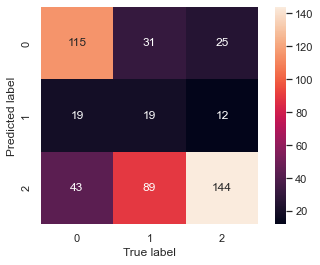

Accuracy:	0.559356
F1-score:	0.497392
Precision:	0.524751
Recall:		0.527329

Classification performance:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       177
           1       0.38      0.14      0.20       139
           2       0.52      0.80      0.63       181

    accuracy                           0.56       497
   macro avg       0.52      0.53      0.50       497
weighted avg       0.54      0.56      0.52       497



2022-03-24 17:20:43.269911: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: RNN_s140.pb/assets


INFO:tensorflow:Assets written to: RNN_s140.pb/assets


s140 CNN confusion matrix


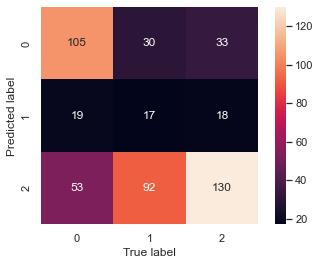

Accuracy:	0.507042
F1-score:	0.451679
Precision:	0.470847
Recall:		0.477918

Classification performance:
              precision    recall  f1-score   support

           0       0.62      0.59      0.61       177
           1       0.31      0.12      0.18       139
           2       0.47      0.72      0.57       181

    accuracy                           0.51       497
   macro avg       0.47      0.48      0.45       497
weighted avg       0.48      0.51      0.47       497

INFO:tensorflow:Assets written to: CNN_s140.pb/assets


INFO:tensorflow:Assets written to: CNN_s140.pb/assets


rtmr RNN confusion matrix


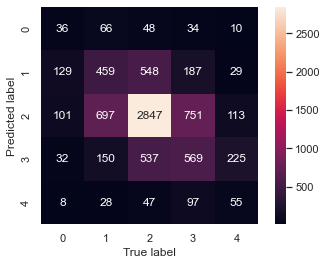

Accuracy:	0.508266
F1-score:	0.334141
Precision:	0.353317
Recall:		0.325434

Classification performance:
              precision    recall  f1-score   support

           0       0.19      0.12      0.14       306
           1       0.34      0.33      0.33      1400
           2       0.63      0.71      0.67      4027
           3       0.38      0.35      0.36      1638
           4       0.23      0.13      0.16       432

    accuracy                           0.51      7803
   macro avg       0.35      0.33      0.33      7803
weighted avg       0.49      0.51      0.49      7803



INFO:tensorflow:Assets written to: RNN_rtmr.pb/assets


INFO:tensorflow:Assets written to: RNN_rtmr.pb/assets


rtmr CNN confusion matrix


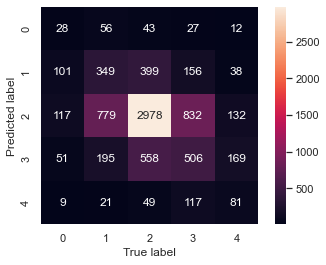

Accuracy:	0.505190
F1-score:	0.325875
Precision:	0.350674
Recall:		0.315342

Classification performance:
              precision    recall  f1-score   support

           0       0.17      0.09      0.12       306
           1       0.33      0.25      0.29      1400
           2       0.62      0.74      0.67      4027
           3       0.34      0.31      0.32      1638
           4       0.29      0.19      0.23       432

    accuracy                           0.51      7803
   macro avg       0.35      0.32      0.33      7803
weighted avg       0.47      0.51      0.48      7803

INFO:tensorflow:Assets written to: CNN_rtmr.pb/assets


INFO:tensorflow:Assets written to: CNN_rtmr.pb/assets


In [157]:
def predict_sentiments(model, x, threshold_1=0.3, threshold_2=0.7):
    predictions = model(x)

    output = []
    for prediction in predictions:
        if prediction<threshold_1:
            output.append(0)
        elif prediction<threshold_2:
            output.append(1)
        else:
            output.append(2)
    return np.array(output)

sentiment_predictions = predict_sentiments(rnn, X_test_ready, 0.4, 0.6)      
print("s140 RNN confusion matrix")  
make_confusion(s140_y_test, sentiment_predictions)
rnn.save("RNN_s140.pb")

sentiment_predictions = predict_sentiments(cnn, X_test_ready)      
print("s140 CNN confusion matrix")  
make_confusion(s140_y_test, sentiment_predictions)
cnn.save("CNN_s140.pb")

sentiment_predictions = np.argmax(rtmr_rnn.predict(rtmr_x_test_ready), axis=1)    
print("rtmr RNN confusion matrix")  
make_confusion(rtmr_y_test, sentiment_predictions)
rtmr_rnn.save("RNN_rtmr.pb")

sentiment_predictions = np.argmax(rtmr_cnn.predict(rtmr_x_test_ready), axis=1)    
print("rtmr CNN confusion matrix")  
make_confusion(rtmr_y_test, sentiment_predictions)
rtmr_cnn.save("CNN_rtmr.pb")

In [190]:
def predict_post(text, model):
    sequence = token_model.texts_to_sequences([text])
    vector = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=length, padding="post")
    
    model = tf.keras.models.load_model(model)

    value = model.predict(vector)
    return value

predict_post("best", "RNN_rtmr.pb")

##

array([[0.00596238, 0.01783083, 0.0892764 , 0.8391911 , 0.04773924]],
      dtype=float32)

In [179]:
predict_post("I loved the movie I will tell all my friends to go watch it!! enjoyed great brilliant", "RNN_rtmr.pb")

array([[8.0279654e-01, 1.8938547e-01, 3.2198089e-04, 1.5896758e-03,
        5.9063281e-03]], dtype=float32)